# Lambda School Data Science Module 142
## Sampling, Confidence Intervals, and Hypothesis Testing

## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

In [1]:
import numpy as np
from scipy.stats import chisquare  # One-way chi square test

# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation

ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)
print(chisquare(ind_obs, axis=None))

dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print(chisquare(dep_obs, axis=None))

[[1 2]
 [1 2]]
Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)
[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


In [2]:
# Distribution tests:
# We often assume that something is normal, but it can be important to *check*

# For example, later on with predictive modeling, a typical assumption is that
# residuals (prediction errors) are normal - checking is a good diagnostic

from scipy.stats import normaltest
# Poisson models arrival times and is related to the binomial (coinflip)
sample = np.random.poisson(5, 1000)
print(normaltest(sample))  # Pretty clearly not normal

NormaltestResult(statistic=38.23056971373099, pvalue=4.992720642287588e-09)


In [3]:
# Kruskal-Wallis H-test - compare the median rank between 2+ groups
# Can be applied to ranking decisions/outcomes/recommendations
# The underlying math comes from chi-square distribution, and is best for n>5
from scipy.stats import kruskal

x1 = [1, 3, 5, 7, 9]
y1 = [2, 4, 6, 8, 10]
print(kruskal(x1, y1))  # x1 is a little better, but not "significantly" so

x2 = [1, 1, 1]
y2 = [2, 2, 2]
z = [2, 2]  # Hey, a third group, and of different size!
print(kruskal(x2, y2, z))  # x clearly dominates

KruskalResult(statistic=0.2727272727272734, pvalue=0.6015081344405895)
KruskalResult(statistic=7.0, pvalue=0.0301973834223185)


And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

## Live Lecture - let's explore some more of scipy.stats

In [4]:
# Taking requests! Come to lecture with a topic or problem and we'll try it.

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):

1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.

In [ ]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip
!ls

--2018-12-04 13:49:01--  http://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42989872 (41M) [application/zip]
Saving to: ‘drugsCom_raw.zip.2’

drugsCom_raw.zip.2  100%[===================>]  41.00M  13.1MB/s    in 4.5s    

2018-12-04 13:49:06 (9.03 MB/s) - ‘drugsCom_raw.zip.2’ saved [42989872/42989872]

LS_DS_142_Sampling_Confidence_Intervals_and_Hypothesis_Testing.ipynb
drugsComTest_raw.tsv
drugsComTrain_raw.tsv
drugsCom_raw.zip
drugsCom_raw.zip.1
drugsCom_raw.zip.2


In [ ]:
!unzip drugsCom_raw.zip

Archive:  drugsCom_raw.zip
replace drugsComTest_raw.tsv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [1]:
import pandas as pd

In [2]:
original = pd.read_table('drugsComTrain_raw.tsv')

In [3]:
original.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [4]:
ct = pd.crosstab([original['drugName'], original['condition']], original['rating'])
ct

rating                                                                                   1.0   \
drugName                             condition                                                  
A + D Cracked Skin Relief            Bacterial Skin Infection                               0   
A / B Otic                           Otitis Media                                           0   
Abacavir / dolutegravir / lamivudine HIV Infection                                          1   
Abacavir / lamivudine / zidovudine   HIV Infection                                          0   
Abatacept                            Juvenile Idiopathic Arthritis                          0   
                                     Rheumatoid Arthritis                                   3   
Abilify                              3</span> users found this comment helpful.             0   
                                     Agitated State                                         5   
                                     Autism                                                 1   
                                     Bipolar Disorde                                       29   
                                     Borderline Personality Disorde                         0   
                                     Depression                                            28   
                                     Major Depressive Disorde                               8   
                                     Obsessive Compulsive Disorde                           0   
                                     Post Traumatic Stress Disorde                          0   
                                     Schizoaffective Disorde                                2   
                                     Schizophrenia                                          7   
                                     Tourette's Syndrome                                    0   
Abilify Discmelt                     Bipolar Disorde                                        0   
                                     Post Traumatic Stress Disorde                          0   
Abilify Maintena                     Schizophrenia                                          1   
Abiraterone                          Prostate Cance                                         0   
AbobotulinumtoxinA                   Cervical Dystonia                                      0   
                                     acial Wrinkles                                         0   
Abraxane                             Breast Cance                                           0   
                                     Pancreatic Cance                                       1   
Abreva                               Herpes Simplex                                        53   
Absorbine Jr.                        Rheumatoid Arthritis                                   0   
Absorica                             Acne                                                   1   
Acamprosate                          Alcohol Dependence                                     4   
...                                                                                       ...   
Zyprexa                              Depression                                             7   
                                     Insomnia                                               1   
                                     Major Depressive Disorde                               2   
                                     Obsessive Compulsive Disorde                           0   
                                     Paranoid Disorde                                       1   
                                     Schizoaffective Disorde                                5   
                                     Schizophrenia                                          3   
Zyprexa Intramuscular                Agitation                                              0   
Zyprexa Zydis          

In [5]:
print(original.condition.unique)  # 161,297 conditions. Pick some and find CI.

<bound method Series.unique of 0         Left Ventricular Dysfunction
1                                 ADHD
2                        Birth Control
3                        Birth Control
4                    Opiate Dependence
5         Benign Prostatic Hyperplasia
6              Emergency Contraception
7                      Bipolar Disorde
8                             Epilepsy
9                        Birth Control
10                 Migraine Prevention
11                          Depression
12                     Crohn's Disease
13                               Cough
14                       Birth Control
15                             Obesity
16             Urinary Tract Infection
17                         ibromyalgia
18                     Bipolar Disorde
19        Chronic Myelogenous Leukemia
20                       HIV Infection
21                            Insomnia
22                       Birth Control
23                Rheumatoid Arthritis
24             Vaginal Yeast Infe

In [6]:
original.isnull().sum().sum()

899

In [7]:
# There are 899 N/A values compared to 
# 161297 conditions x num_drugs_per_condition x 10 review ratings.
# So not a large number.  Once we select a condition to look at,
# we will see how many N/A values there are for that condition.
# Until then, drop all N/A values
subset = original.dropna()

In [8]:
subset.isnull().sum().sum()

0

In [44]:
subset = subset[subset['condition'].str.contains('Diabetes')]
subset

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
50,156544,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10.0,"October 24, 2017",24
146,156730,Dulaglutide,"Diabetes, Type 2","""I was recently referred to a endocrinologist ...",9.0,"November 5, 2015",12
168,26916,Insulin degludec,"Diabetes, Type 1","""My Endo insisted I switch from lantus to tres...",1.0,"May 1, 2017",12
182,82188,Liraglutide,"Diabetes, Type 2","""have only been on victorza for a few days. I...",5.0,"January 28, 2016",18
187,32822,Empagliflozin,"Diabetes, Type 2","""I have been taking Jardiance for just over a ...",10.0,"January 6, 2017",47
223,178948,Victoza,"Diabetes, Type 2","""I&#039;ve been on Victoza for 13 days and hav...",10.0,"November 29, 2010",6
251,82584,Liraglutide,"Diabetes, Type 2","""I have only been on Victoza for less than a w...",10.0,"April 15, 2011",6
256,81720,Liraglutide,"Diabetes, Type 2","""Started this last night. I have zero appetite...",10.0,"May 6, 2017",13
271,198429,Exenatide,"Diabetes, Type 2","""I was on Bydureon for about 2 months, I reall...",6.0,"May 28, 2013",34
281,13891,Bydureon,"Diabetes, Type 2","""Within 2 weeks saw blood glucose more than ha...",10.0,"March 1, 2017",13


In [45]:
grouped_by_drug_name = subset.groupby('drugName')
grouped_by_drug_name

In [93]:
diabetes_drugs_with_ratings = {}
for name, group in grouped_by_drug_name:
    # print('name:', name, 'rating:', group.rating)
    current_ratings = diabetes_drugs_with_ratings.get(name, [])
    for k, v in group.rating.items():
        current_ratings.append(v)
    diabetes_drugs_with_ratings[name] = current_ratings
# print('Diabetes Drugs with Ratings:', diabetes_drugs_with_ratings)

In [94]:
# for name, ratings in diabetes_drugs_with_ratings.items():
#     print('name:', name, 'ratings:', ratings)

In [48]:
# This is a direct copy from Aaron's notebook.˘
#
import numpy as np
from scipy import stats

def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2., n - 1)
  return (mean, mean - interval, mean + interval)

In [95]:
drug_names = []
means = []
lower_bounds = []
upper_bounds = []
for k, v in diabetes_drugs_with_ratings.items():
    
    if len(v) < 20:  # Take only drugs with 20 or more ratings.
        continue     # A highly rated drug with less ratings should be avoided.
        
    mean, lower_bound, upper_bound = confidence_interval(v)
    # print(k, ':', 'mean:', mean, 
    #       'lower bound:', lower_bound,
    #       'upper bound:', upper_bound)
    if (mean == None) or (lower_bound == None) or (upper_bound == None):
        continue
        
    drug_names.append(k)
    means.append(mean)
    lower_bounds.append(lower_bound)
    upper_bounds.append(upper_bound)

In [54]:
diabetes_drugs = pd.DataFrame({'drug': drug_names,
                               'mean': means,
                               'lower bounds': lower_bounds,
                               'upper bounds': upper_bounds})

In [86]:
top_rated_drugs = diabetes_drugs.sort_values('mean', ascending = False)
top_rated_drug_names = top_rated_drugs['drug'][0:10]
drug_names_to_plot = []
for k, v in top_rated_drug_names.items():
    drug_names_to_plot.append(v)
drug_names_to_plot

['Byetta',
 'Victoza',
 'Liraglutide',
 'Glimepiride',
 'Afrezza',
 'Lantus',
 'Insulin inhalation, rapid acting',
 'Exenatide',
 'Empagliflozin',
 'Bydureon']

In [60]:
!pip install seaborn

  Using cached https://files.pythonhosted.org/packages/a8/76/220ba4420459d9c4c9c9587c6ce607bf56c25b3d3d2de62056efe482dadc/seaborn-0.9.0-py3-none-any.whl
    100% |████████████████████████████████| 14.1MB 3.4MB/s eta 0:00:01


Text(0.5, 1.0, 'Top 10 Diabetes drugs with ratings')

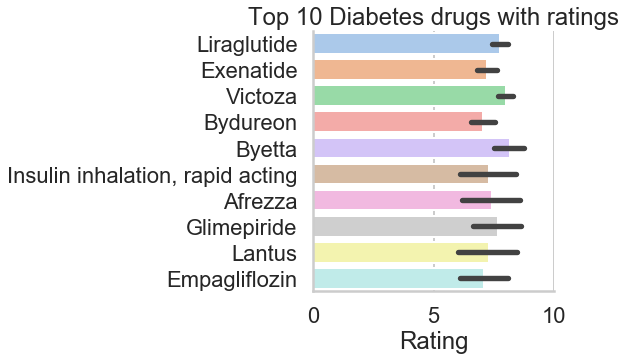

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

small_subset = subset.loc[
    subset['drugName'].isin(drug_names_to_plot)]

sns.set(style="whitegrid")
sns.set_context('poster')
g = sns.catplot('rating',
                'drugName',
                kind = 'bar',
                data = small_subset.sort_values(
                'rating', ascending = False),
                palette = 'pastel')
g.set(xlabel = 'Rating', ylabel = '')
plt.xlim(0, 10)
plt.title('Top 10 Diabetes drugs with ratings')